> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [712]:
#   Use this cell to set up import statements for all of the packages that you
#   plan to use.

from pandas import read_csv                           #import pandas
from numpy import set_printoptions                    #import numpy
import matplotlib.pyplot as plt                       #import matplotlib
from sklearn.feature_selection import SelectKBest     #import SelectKBest
from sklearn.feature_selection import chi2            #import chi2
import seaborn as sns                                 #import seaborn

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler #library for data cleaning and preproces
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

..

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [713]:
# Load your data and print out a few lines. Perform operations to inspect data
#load data
filePath = "C:/Users/allen/PYTHONWorkspace/PythonScripts/QUICKSTUDY/PROJECTS/"
fileName = "WA_Fn-UseC_-HR-Employee-Attrition.csv"

dataFrame = read_csv(filePath + fileName)

#print(dataFrame)
dataFrame.head() #peek data

#   types and look for instances of missing or possibly errant data.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [714]:
dataFrame['StandardHours'].values != 80

array([False, False, False, ..., False, False, False])

In [715]:
dataFrame['Department'].values

array(['Sales', 'Research & Development', 'Research & Development', ...,
       'Research & Development', 'Sales', 'Research & Development'],
      dtype=object)

In [716]:
dataFrame['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [717]:
dataFrame['Over18'].values

array(['Y', 'Y', 'Y', ..., 'Y', 'Y', 'Y'], dtype=object)

In [718]:
dataFrame['Over18'] != 'Y'

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: Over18, Length: 1470, dtype: bool

In [719]:
dataFrame['EmployeeCount'] != 1

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: EmployeeCount, Length: 1470, dtype: bool

In [720]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                



### check for missing values

In [721]:
dataFrame.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

there are no missing values in the above data, however we need to drop **Over18** , **employeeCount**  ,**EmployeeNumber** and **StandardHours** features as they do not have contributory influence on the data outcome

In [722]:
dfx = df

In [723]:
# Remove the column names of interest

df = dataFrame.drop(['EmployeeCount', 'Over18','EmployeeNumber','StandardHours'], axis = 1)

In [724]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [725]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [726]:
df = df[['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
  'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager','Gender', 'MaritalStatus','JobRole','BusinessTravel','Department','EducationField','Attrition']]

In [727]:
df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,MaritalStatus,JobRole,BusinessTravel,Department,EducationField,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,4,0,5,Female,Single,Sales Executive,Travel_Rarely,Sales,Life Sciences,Yes
1,49,279,8,1,3,61,2,2,2,5130,...,7,1,7,Male,Married,Research Scientist,Travel_Frequently,Research & Development,Life Sciences,No
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,Male,Single,Laboratory Technician,Travel_Rarely,Research & Development,Other,Yes
3,33,1392,3,4,4,56,3,1,3,2909,...,7,3,0,Female,Married,Research Scientist,Travel_Frequently,Research & Development,Life Sciences,No
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,2,Male,Married,Laboratory Technician,Travel_Rarely,Research & Development,Medical,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,2,0,3,Male,Married,Laboratory Technician,Travel_Frequently,Research & Development,Medical,No
1466,39,613,6,1,4,42,2,3,1,9991,...,7,1,7,Male,Married,Healthcare Representative,Travel_Rarely,Research & Development,Medical,No
1467,27,155,4,3,2,87,4,2,2,6142,...,2,0,3,Male,Married,Manufacturing Director,Travel_Rarely,Research & Development,Life Sciences,No
1468,49,1023,2,3,4,63,2,2,2,5390,...,6,0,8,Male,Married,Sales Executive,Travel_Frequently,Sales,Medical,No


In [728]:
dfx = df

In [729]:
dfxtrim = dfx.iloc[:,0:len(df.columns)-7]
dfxtrim

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


### desciptive analysis

In [730]:
dfxtrim.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [731]:
dfxtrim.columns.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

The mean , mode and median are not approximately the same, hence the data set is not normal

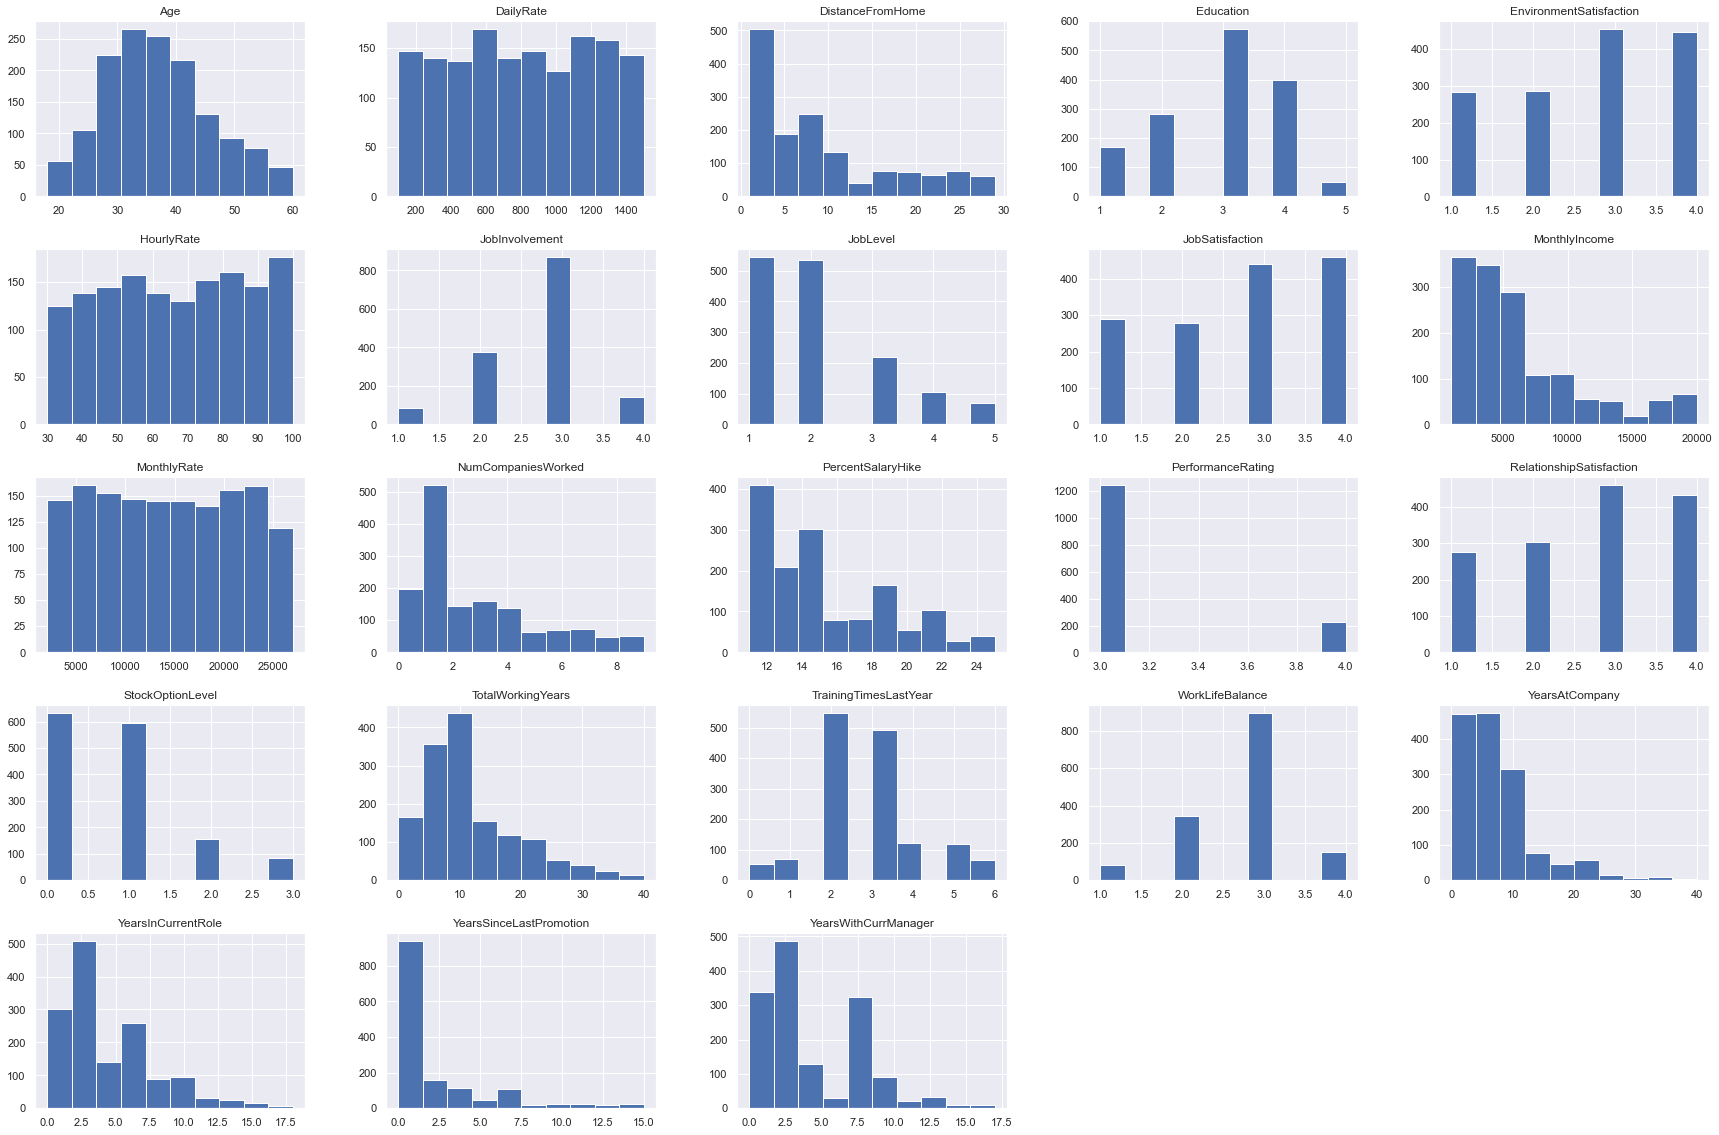

In [732]:
# ###check for normality

dfxtrim.hist()
plt.gcf().set_size_inches(30,20)
plt.show()

From the data, the outcome is attrition, while the rest of the features are the predictor variables.hence reordering the features and placing the outcome at the last column of the dataframe

In [733]:
#converting non-numeric columns to numeric

#initializing an object of class LabelEncoder
labelencoder = LabelEncoder()

for column in dfx:
    if dfx[column].dtype == np.number:
        continue
    dfx[column] = labelencoder.fit_transform(dfx[column])

C:\Users\allen\AppData\Local\Temp/ipykernel_29220/1738942168.py:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dfx[column].dtype == np.number:


In [734]:
dfx

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,MaritalStatus,JobRole,BusinessTravel,Department,EducationField,Attrition
0,23,624,0,1,1,64,2,1,3,809,...,4,0,5,0,2,7,2,2,1,1
1,31,113,7,0,2,31,1,1,1,682,...,7,1,7,1,1,6,1,1,1,0
2,19,805,1,1,3,62,1,0,2,62,...,0,0,0,1,2,2,2,1,4,1
3,15,820,2,3,3,26,2,0,2,313,...,7,3,0,0,1,6,1,1,1,0
4,9,312,1,0,0,10,2,0,1,399,...,2,2,2,1,1,2,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,494,22,1,2,11,3,1,3,210,...,2,0,3,1,1,2,1,1,3,0
1466,21,327,5,0,3,12,1,2,0,1070,...,7,1,7,1,1,0,2,1,3,0
1467,9,39,3,2,1,57,3,1,1,821,...,2,0,3,1,1,4,2,1,1,0
1468,31,579,1,2,3,33,1,1,1,730,...,6,0,8,1,1,7,1,2,3,0


In [735]:
dfx.shape

(1470, 31)

# PREPROCESSING

# Data transformation


transform our data to prepare it for machine learning

Normalize the dataset


In [736]:
#x variable are predictor variable
#y variable is predicted
#to standardize we need to seperate the data x and y
#using slicing
#x = df.iloc[:,0:len(df.columns)-1]
array = dfx.values
x = array[:,0:len(dfx.columns)-1]
y = array[:,30]


In [737]:
x

array([[ 23, 624,   0, ...,   2,   2,   1],
       [ 31, 113,   7, ...,   1,   1,   1],
       [ 19, 805,   1, ...,   2,   1,   4],
       ...,
       [  9,  39,   3, ...,   2,   1,   1],
       [ 31, 579,   1, ...,   1,   2,   3],
       [ 16, 336,   7, ...,   2,   1,   3]], dtype=int64)

In [738]:
from sklearn.preprocessing import MinMaxScaler #library for data cleaning and preproces

from numpy import set_printoptions
rescaler = MinMaxScaler(feature_range=(0,1))
rescaledX = rescaler.fit_transform(x)
set_printoptions(precision=3)
#print(rescaledX[0:5,:])
print(rescaledX)

[[0.548 0.705 0.    ... 1.    1.    0.2  ]
 [0.738 0.128 0.25  ... 0.5   0.5   0.2  ]
 [0.452 0.91  0.036 ... 1.    0.5   0.8  ]
 ...
 [0.214 0.044 0.107 ... 1.    0.5   0.2  ]
 [0.738 0.654 0.036 ... 0.5   1.    0.6  ]
 [0.381 0.38  0.25  ... 1.    0.5   0.6  ]]


In [739]:

rescaler = MinMaxScaler(feature_range=(0,1))
rescaledf = rescaler.fit_transform(x)
set_printoptions(precision=3)
#print(rescaledX[0:5,:])
print(rescaledf)

[[0.548 0.705 0.    ... 1.    1.    0.2  ]
 [0.738 0.128 0.25  ... 0.5   0.5   0.2  ]
 [0.452 0.91  0.036 ... 1.    0.5   0.8  ]
 ...
 [0.214 0.044 0.107 ... 1.    0.5   0.2  ]
 [0.738 0.654 0.036 ... 0.5   1.    0.6  ]
 [0.381 0.38  0.25  ... 1.    0.5   0.6  ]]


In [740]:
normalizeFit = Normalizer().fit(rescaledf)
normalizedTrf = normalizeFit.transform(rescaledf)

print(normalizedTrf)

[[0.173 0.223 0.    ... 0.317 0.317 0.063]
 [0.245 0.042 0.083 ... 0.166 0.166 0.066]
 [0.145 0.291 0.011 ... 0.32  0.16  0.256]
 ...
 [0.073 0.015 0.036 ... 0.341 0.17  0.068]
 [0.248 0.219 0.012 ... 0.168 0.335 0.201]
 [0.14  0.14  0.092 ... 0.368 0.184 0.221]]


In [741]:
dfx.columns.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Gender',
 'MaritalStatus',
 'JobRole',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Attrition']

In [742]:
nomdf = pd.DataFrame(normalizedTrf,columns = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Gender',
 'MaritalStatus',
 'JobRole',
 'BusinessTravel',
 'Department',
 'EducationField'])
nomdf

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,MaritalStatus,JobRole,BusinessTravel,Department,EducationField
0,0.173468,0.223348,0.000000,0.079192,0.105589,0.289616,0.211178,0.079192,0.316767,0.190107,...,0.052795,0.070393,0.000000,0.093167,0.000000,0.316767,0.277171,0.316767,0.316767,0.063353
1,0.245414,0.042454,0.083124,0.000000,0.221664,0.147249,0.110832,0.083124,0.110832,0.168222,...,0.092360,0.129304,0.022166,0.136910,0.332497,0.166248,0.249372,0.166248,0.166248,0.066499
2,0.144845,0.291240,0.011435,0.080046,0.320183,0.283591,0.106728,0.000000,0.213455,0.014727,...,0.000000,0.000000,0.000000,0.000000,0.320183,0.320183,0.080046,0.320183,0.160091,0.256146
3,0.125006,0.324310,0.025001,0.262513,0.350018,0.130007,0.233345,0.000000,0.233345,0.081273,...,0.077782,0.136118,0.070004,0.000000,0.000000,0.175009,0.262513,0.175009,0.175009,0.070004
4,0.081045,0.133335,0.013508,0.000000,0.000000,0.054030,0.252140,0.000000,0.126070,0.111948,...,0.021012,0.042023,0.050428,0.044495,0.378210,0.189105,0.094553,0.378210,0.189105,0.226926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.151866,0.197797,0.278420,0.088588,0.236235,0.055684,0.354353,0.088588,0.354353,0.055203,...,0.049216,0.039373,0.000000,0.062533,0.354353,0.177176,0.088588,0.177176,0.177176,0.212612
1466,0.178292,0.131755,0.063676,0.000000,0.356583,0.061129,0.118861,0.178292,0.000000,0.283045,...,0.069336,0.138671,0.023772,0.146828,0.356583,0.178292,0.000000,0.356583,0.178292,0.213950
1467,0.072985,0.015009,0.036492,0.170297,0.113532,0.277341,0.340595,0.085149,0.113532,0.207439,...,0.056766,0.037844,0.000000,0.060105,0.340595,0.170297,0.170297,0.340595,0.170297,0.068119
1468,0.247501,0.219381,0.011976,0.167662,0.335323,0.158081,0.111774,0.083831,0.111774,0.181592,...,0.083831,0.111774,0.000000,0.157799,0.335323,0.167662,0.293408,0.167662,0.335323,0.201194


In [743]:
nomdf.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,MaritalStatus,JobRole,BusinessTravel,Department,EducationField
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.150420,0.168761,0.098201,0.161220,0.192692,0.173196,0.195231,0.085702,0.193718,0.160553,...,0.063917,0.077663,0.047323,0.080415,0.200723,0.185360,0.187104,0.271394,0.211525,0.151749
std,0.068083,0.096247,0.096483,0.085901,0.122323,0.098255,0.081325,0.085841,0.123561,0.090245,...,0.051291,0.063908,0.066843,0.067720,0.166282,0.124166,0.102923,0.114781,0.084338,0.090026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100253,0.088278,0.012896,0.090882,0.107273,0.089784,0.123452,0.000000,0.107184,0.082848,...,0.026994,0.034836,0.000000,0.035639,0.000000,0.145092,0.095271,0.190982,0.163025,0.069759
50%,0.145042,0.167645,0.072986,0.169448,0.215728,0.175883,0.211257,0.080880,0.217231,0.162718,...,0.051958,0.057145,0.022524,0.059362,0.301678,0.174562,0.202813,0.313557,0.181423,0.133314
75%,0.196595,0.251168,0.155120,0.226624,0.300776,0.252590,0.240207,0.147359,0.302611,0.239213,...,0.086857,0.128757,0.060417,0.136336,0.338899,0.308295,0.272670,0.346720,0.297502,0.211987
max,0.351878,0.461657,0.408613,0.444131,0.450623,0.440372,0.431211,0.358112,0.557999,0.340578,...,0.278090,0.313904,0.333848,0.334538,0.495668,0.455027,0.411425,0.483233,0.411425,0.412143


TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [677]:
dfx.columns.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Gender',
 'MaritalStatus',
 'JobRole',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Attrition']

In [547]:
dfx = dataFrame.drop(['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager','Over18','StandardHours','EmployeeCount','EmployeeNumber'], axis = 1)

In [548]:
dfx

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [549]:
dfx.columns.tolist()

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

For this exploratory analysis we will be using dataframe df

In [551]:
dfx.head() 



#final wrangled data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [550]:
nomdf1 = nomdf

In [553]:
nomdf1

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.220636,0.284079,0.000000,0.100725,0.134300,0.368366,0.268600,0.100725,0.402901,0.241800,...,0.000000,0.000000,0.000000,0.082646,0.000000,0.000000,0.067150,0.089533,0.000000,0.118500
1,0.285303,0.049355,0.096635,0.000000,0.257693,0.171182,0.128847,0.096635,0.128847,0.195564,...,0.386540,0.386540,0.128847,0.099113,0.193270,0.257693,0.107372,0.150321,0.025769,0.159163
2,0.187809,0.377628,0.014827,0.103789,0.415157,0.367710,0.138386,0.000000,0.276771,0.019095,...,0.000000,0.138386,0.000000,0.074515,0.207578,0.276771,0.000000,0.000000,0.000000,0.000000
3,0.136858,0.355058,0.027372,0.287402,0.383203,0.142333,0.255469,0.000000,0.255469,0.088978,...,0.000000,0.255469,0.000000,0.078606,0.191601,0.255469,0.085156,0.149023,0.076641,0.000000
4,0.106238,0.174783,0.017706,0.000000,0.000000,0.070826,0.330519,0.000000,0.165260,0.146748,...,0.000000,0.495779,0.165260,0.076274,0.247890,0.330519,0.027543,0.055087,0.066104,0.058327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.178086,0.231948,0.326491,0.103884,0.277023,0.065298,0.415534,0.103884,0.415534,0.064735,...,0.000000,0.277023,0.138511,0.181130,0.207767,0.277023,0.057713,0.046170,0.000000,0.073330
1466,0.223504,0.165165,0.079823,0.000000,0.447007,0.076630,0.149002,0.223504,0.000000,0.354820,...,0.000000,0.000000,0.149002,0.103156,0.372506,0.298005,0.086918,0.173836,0.029800,0.184062
1467,0.088746,0.018250,0.044373,0.207073,0.138049,0.337233,0.414146,0.103536,0.138049,0.252236,...,0.414146,0.138049,0.138049,0.063715,0.000000,0.276097,0.069024,0.046016,0.000000,0.073085
1468,0.321585,0.285048,0.015561,0.217848,0.435695,0.205399,0.145232,0.108924,0.145232,0.235948,...,0.000000,0.435695,0.000000,0.189918,0.217848,0.145232,0.108924,0.145232,0.000000,0.205033


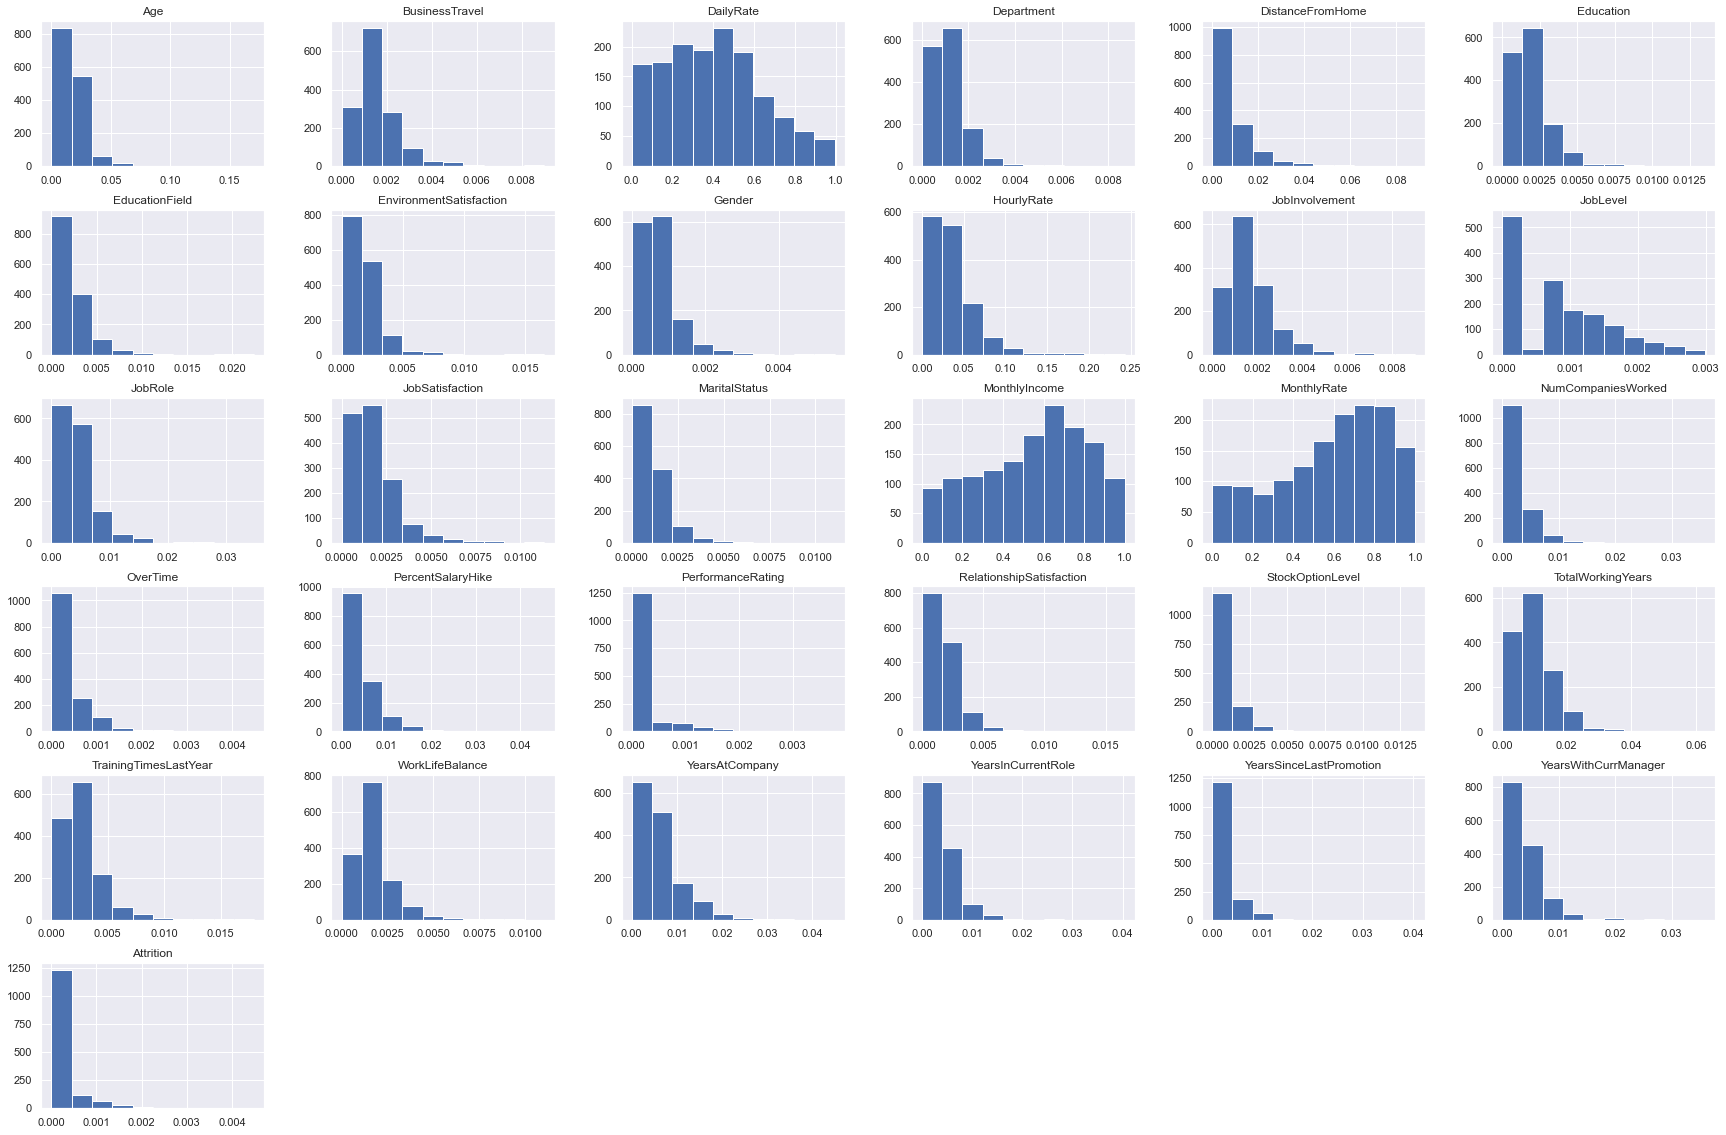

In [554]:
# ###check for normality

normalized.hist()
plt.gcf().set_size_inches(30,20)
plt.show()

In [555]:
from numpy import set_printoptions
rescaler = MinMaxScaler(feature_range=(0,1))
rescaledX = rescaler.fit_transform(x)
set_printoptions(precision=3)
#print(rescaledX[0:5,:])
print(rescaledX)

[[0.548 0.705 0.    ... 0.222 0.    0.294]
 [0.738 0.128 0.25  ... 0.389 0.067 0.412]
 [0.452 0.91  0.036 ... 0.    0.    0.   ]
 ...
 [0.214 0.044 0.107 ... 0.111 0.    0.176]
 [0.738 0.654 0.036 ... 0.333 0.    0.471]
 [0.381 0.38  0.25  ... 0.167 0.067 0.118]]


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
#   After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.





<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

Many factors affect employee attrition. Within our scope, we will analyse the effect of these features in our dataset, to understand the roles they play in increasing or decreasing employee attrition.
insights from this can be recommended to organisations to help decrease employee attrition.

In [ ]:
#lets see the relationship between the features and attrition.
df['Attrition'].value_counts()

In [ ]:
df['Attrition'].value_counts(normalize=True)

from the data set there are 16.1% attrition. About 83.8% employees remain with the company.

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age', hue='Attrition',data=df);
plt.title('Age distribution')

In [ ]:
From the age distribution plot above, for all ages 18 to 60 ,the organisation recorded most attrition at the age range of 28 to 33.Attrition was recorded for the younger age among the employees. 

In [ ]:
#   Use this, and more code cells, to explore your data. Don't forget to add
from the barplot above, attrition 
#   Markdown cells to document your observations and findings.


In [ ]:
df['Age'].max()

In [ ]:
df['Age'].min()

In [ ]:
df.columns.tolist()

In [ ]:
df['BusinessTravel'].value_counts()

In [ ]:
sns.scatterplot(data=df,
         x='BusinessTravel',
         y='Age',
         hue='Attrition')
plt.title('BusinessTravel and Age Relationship')

plt.show()


From the scatterplot it evident that most employees that attrited where employees that traveled frequently and where on business travel and below the Age of 35. 

In [ ]:
df['Department'].value_counts()

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Department',data=df,hue='Attrition')
plt.title('Relationship between Attrition and Department')

Employees that have stayed with the company within the **R&D** Department showed the most Attrition.  

In [ ]:
df['DailyRate'].value_counts()

### Research Question 2  (Replace this header name!)

In [280]:
#   Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   Investigate.



<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!